In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv

from langchain.chat_models import ChatOpenAI
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent


# .env 読み込み
print(r"..\environment\.env")
load_dotenv(dotenv_path=r'..\environment/.env',override=True)

# =========================
# 🔐 Metabase 認証・データ取得
# =========================

login_url = "https://metabase.tr-com.net/api/session"
username = os.getenv("MB_USERNAME", "").strip()
password = os.getenv("MB_PASSWORD", "").strip()

if not username or not password:
    raise ValueError("❌ MB_USERNAME または MB_PASSWORD が設定されていません")

print(f"ログイン試行中 → username: '{username}'")

response = requests.post(login_url, json={"username": username, "password": password})
if response.status_code == 200:
    session_id = response.json().get("id")
    print("✅ ログイン成功")
else:
    raise Exception(f"❌ ログイン失敗: {response.status_code}, {response.text}")


..\environment\.env
ログイン試行中 → username: 'y-nitta@torishima.co.jp'
✅ ログイン成功


In [2]:

# データ取得
url = "https://metabase.tr-com.net/api/card/2070/query/json"
headers = {
    "Content-Type": "application/json",
    "X-Metabase-Session": session_id
}


In [3]:

response = requests.post(url, headers=headers)
if response.status_code == 200:
    try:
        data = response.json()
        dfori = pd.DataFrame(data)
        if dfori.empty:
            raise ValueError("❌ 取得したデータが空です。Metabaseを確認してください。")
        print("✅ データ取得成功")
        print(dfori.head())

    except Exception as e:
        raise Exception(f"❌ データ取得・DataFrame変換失敗: {e}")
else:
    raise Exception(f"❌ データ取得失敗: {response.status_code}, {response.text}")


✅ データ取得成功
   SensorId                               AssetId SensorType Orientation
0  EC10017B  e7877c64-7407-4375-ad20-206b5d0f89c2          M           2
1  EC1001B2  04fa37c4-89f8-4e46-a2dc-37c6b0c53c76          M           2
2  EC1003CA  867c50e0-9b92-43e1-ab1c-bc784040ea28          M           2
3  EC1003CE  d672d87c-055f-4c06-85fa-b2a502d6d8f5          M           2
4  EC1003E0  a8eae6a7-ecdb-4959-9d8b-50db3619e680          M           2


In [4]:

# データ取得
url = "https://metabase.tr-com.net/api/card/2071/query/json"
headers = {
    "Content-Type": "application/json",
    "X-Metabase-Session": session_id
}


In [5]:

response = requests.post(url, headers=headers)
if response.status_code == 200:
    try:
        data = response.json()
        dfpump = pd.DataFrame(data)
        if dfpump.empty:
            raise ValueError("❌ 取得したデータが空です。Metabaseを確認してください。")
        print("✅ データ取得成功")
        print(dfpump.head())

    except Exception as e:
        raise Exception(f"❌ データ取得・DataFrame変換失敗: {e}")
else:
    raise Exception(f"❌ データ取得失敗: {response.status_code}, {response.text}")


✅ データ取得成功
                                AssetId      Model  ModelCode
0  000c617f-2bdf-4e56-87b1-659f90586ad0  CAL32-125          7
1  00b9e08c-72af-4edc-8471-464e30fdb7d3        CDM          5
2  00bbdac6-ab6a-446f-9541-ee9bb2ffb28d  MMTV200/5          2
3  00c79c40-1525-44cb-bc22-ba387c0f46c5    MMO65/7          8
4  00d079ed-e148-4553-a200-30a981b4d3c2    MMO65/7          8


In [6]:
dfori

,SensorId,AssetId,SensorType,Orientation
0,EC10017B,e7877c64-7407-4375-ad20-206b5d0f89c2,M,2
1,EC1001B2,04fa37c4-89f8-4e46-a2dc-37c6b0c53c76,M,2
2,EC1003CA,867c50e0-9b92-43e1-ab1c-bc784040ea28,M,2
3,EC1003CE,d672d87c-055f-4c06-85fa-b2a502d6d8f5,M,2
4,EC1003E0,a8eae6a7-ecdb-4959-9d8b-50db3619e680,M,2
...,...,...,...,...
2745,XVXP1VB2BEAA71343EA01D6D5F,1acb71e4-2707-44b2-9c76-8ae9cc694fab,M,2
2746,XVXP1VB3AA6C81348D11528858,c2e45286-866a-4512-b8cf-fd8c6355d85c,M,2
2747,XVXP1VB3C0DC613465B457BA21,ec87341b-4bf4-4da2-b918-fd0e49f452d8,M,2
2748,XVXP1VB9E6D4B13465B4233240,fb087902-62aa-411a-ae6d-6fb9cd852edc,M,2


In [7]:

dfori = dfori.drop_duplicates(subset='AssetId', keep='first')
dfori 


,SensorId,AssetId,SensorType,Orientation
0,EC10017B,e7877c64-7407-4375-ad20-206b5d0f89c2,M,2
1,EC1001B2,04fa37c4-89f8-4e46-a2dc-37c6b0c53c76,M,2
2,EC1003CA,867c50e0-9b92-43e1-ab1c-bc784040ea28,M,2
3,EC1003CE,d672d87c-055f-4c06-85fa-b2a502d6d8f5,M,2
4,EC1003E0,a8eae6a7-ecdb-4959-9d8b-50db3619e680,M,2
...,...,...,...,...
2719,XVVC003261134B298CC805,796c2cb8-f1a7-4ef5-9303-e4eec21336ce,M,1
2720,XVVC00327A134B2985A1833,f191d481-37d7-4a90-adce-6c3e5a43c9a2,M,1
2741,XVVC00433B134D88BE4553,14e9a7cf-61c1-46bd-bf34-258f0c7327e5,M,2
2742,XVVC00434D134D95231AA80,6561f9d9-0ec5-407e-8e3d-3c3c560be47a,M,2


In [8]:
dfori[dfori['AssetId'].duplicated(keep=False)]

,SensorId,AssetId,SensorType,Orientation


In [9]:
dfpump

,AssetId,Model,ModelCode
0,000c617f-2bdf-4e56-87b1-659f90586ad0,CAL32-125,7
1,00b9e08c-72af-4edc-8471-464e30fdb7d3,CDM,5
2,00bbdac6-ab6a-446f-9541-ee9bb2ffb28d,MMTV200/5,2
3,00c79c40-1525-44cb-bc22-ba387c0f46c5,MMO65/7,8
4,00d079ed-e148-4553-a200-30a981b4d3c2,MMO65/7,8
...,...,...,...
1484,ff93115d-beb3-4606-a7c4-72d60ff85c99,CDM350X300HN,5
1485,ff97c942-8eb3-47ec-89a5-e333614e36e6,CAL32-125,7
1486,ffa63aa5-8536-45c9-a38f-45f6daba94da,CDM700x600,5
1487,ffecef2d-70a2-44b3-9089-c54455d4943d,MHG4/6,3


In [10]:
dfpump[dfpump['AssetId'].duplicated(keep=False)]

,AssetId,Model,ModelCode


In [11]:

merged_df = pd.merge(dfpump, dfori, on='AssetId', how='inner')
print("マージ後件数:", len(merged_df))


マージ後件数: 213


In [12]:
merged_df

,AssetId,Model,ModelCode,SensorId,SensorType,Orientation
0,00bbdac6-ab6a-446f-9541-ee9bb2ffb28d,MMTV200/5,2,VB39B0E8,M,2
1,02a41c06-b19b-4a11-b505-3f9fd52e184a,MHD40/11E,1,VB9E7FA8,M,2
2,02bab784-8b07-4391-83a7-22fd6dfe05c9,CDM600X500KBA,5,VB89B403,M,2
3,030a1b28-d3dc-46a2-802b-30b8d87359e7,MHG5/11A,3,VC000F1E,M,2
4,03b12cb6-df67-40a1-928e-91ae6149d84d,CAM150-400,7,VB35DCB6,M,2
...,...,...,...,...,...,...
208,fe84ff53-4a3c-4dbd-9348-b330d5e172ee,MML40/6,9,VB6C5EB4,M,2
209,fe91b482-3e69-4177-b210-d909a2ffe185,CAR50-200,7,VBC353F0,M,2
210,ff7a14f4-c0ce-4e0d-81f7-e3ddd0a0c90a,MHG2/9,3,VB3A4993,M,2
211,ff8b6f63-1b9d-4db5-a08a-ef07c8110f0b,CAL200-250,7,VB8B4B10,M,2


In [13]:
merged_df[merged_df['SensorId'].duplicated(keep=False)]

,AssetId,Model,ModelCode,SensorId,SensorType,Orientation


In [14]:
import requests
import pandas as pd

# SensorId 一覧
sensor_ids = merged_df['SensorId'].dropna().tolist()

# Metabase API 情報
url = "https://metabase.tr-com.net/api/card/2072/query/json"
headers = {
    "Content-Type": "application/json",
    "X-Metabase-Session": session_id  
}

# データ格納
results = []

# API ループ
for sid in sensor_ids:
    payload = {
        "parameters": [
            {
                "type": "category",
                "target": ["variable", ["template-tag", "sensorid"]],
                "value": sid
            }
        ]
    }

    response = requests.post(url, headers=headers, json=payload)

    if response.status_code == 200:
        try:
            data = response.json()
            df = pd.DataFrame(data)
            if not df.empty:
                df["sensorid"] = sid  # sensorid 列として追加（小文字）
                results.append(df)
                print(f"✅ SensorId={sid}：取得成功")
            else:
                print(f"⚠️ SensorId={sid}：データなし")
        except Exception as e:
            print(f"❌ SensorId={sid}：JSON変換失敗 - {e}")
    else:
        print(f"❌ SensorId={sid}：リクエスト失敗 - {response.status_code}, {response.text}")

# 統合・整形
if results:
    dffft_all = pd.concat(results, ignore_index=True)

    # sensorid をキーに merged_df から Model + ModelCode を追加
    df_model = merged_df[['SensorId', 'ModelCode', 'Model']].rename(columns={'SensorId': 'sensorid'})
    final_df = pd.merge(dffft_all, df_model, on='sensorid', how='left')

    # 必要な列だけ抽出・並び替え
    final_df = final_df[['sensorid', 'ModelCode', 'Model', 'fftrecord_date', 'fftdatax']]


    # 結果の確認
    print("✅ 最終データフレーム作成完了")
    print(final_df.head())
else:
    raise ValueError("❌ 有効なデータが1件も取得できませんでした。")


✅ SensorId=VB39B0E8：取得成功
✅ SensorId=VB9E7FA8：取得成功
✅ SensorId=VB89B403：取得成功
✅ SensorId=VC000F1E：取得成功
✅ SensorId=VB35DCB6：取得成功
✅ SensorId=VB68F135：取得成功
✅ SensorId=VB3793A7：取得成功
✅ SensorId=VB393DC5：取得成功
✅ SensorId=VC000F2D：取得成功
✅ SensorId=VB2B314F：取得成功
⚠️ SensorId=XVVB36C1BC134893D4E883：データなし
✅ SensorId=VB0FC749：取得成功
✅ SensorId=VB686BD8：取得成功
✅ SensorId=VB68B648：取得成功
✅ SensorId=VBA2ACA6：取得成功
✅ SensorId=VC000EC4：取得成功
✅ SensorId=VB6C5E92：取得成功
✅ SensorId=VB28C465：取得成功
⚠️ SensorId=XVVB3754841343F0152A056：データなし
✅ SensorId=VB681364：取得成功
✅ SensorId=VB3B101D：取得成功
✅ SensorId=VB26E44B：取得成功
✅ SensorId=VB358750：取得成功
✅ SensorId=VB37A672：取得成功
⚠️ SensorId=XVVBC0671B134D6F462960：データなし
✅ SensorId=VB6B6710：取得成功
✅ SensorId=VBA0AE7F：取得成功
✅ SensorId=VB69D129：取得成功
✅ SensorId=VC000682：取得成功
✅ SensorId=VB6889E1：取得成功
⚠️ SensorId=XVVB9E4CF9134893D52B0B：データなし
✅ SensorId=VB0FC36E：取得成功
✅ SensorId=VB6D8DD6：取得成功
✅ SensorId=VBA4BA4A：取得成功
✅ SensorId=VB3938CA：取得成功
✅ SensorId=VB6B063B：取得成功
✅ SensorId=VB8895DE：取得成功
✅ SensorId

In [15]:
# CSVとして保存（文字化け防止にUTF-8 BOM付き）
final_df.to_csv("fft_model_data.csv", index=False, encoding='utf-8-sig')


In [16]:
print(final_df.shape)
print(final_df)


(28201, 5)
       sensorid  ModelCode       Model       fftrecord_date  \
0      VB39B0E8          2   MMTV200/5  2020-04-23T19:14:29   
1      VB39B0E8          2   MMTV200/5  2020-06-23T11:53:55   
2      VB39B0E8          2   MMTV200/5  2020-06-30T11:53:54   
3      VB39B0E8          2   MMTV200/5  2020-07-01T11:53:19   
4      VB39B0E8          2   MMTV200/5  2020-07-08T11:53:19   
...         ...        ...         ...                  ...   
28196  VB8BC173          5  CDM700x600  2022-05-09T05:46:12   
28197  VB8BC173          5  CDM700x600  2022-05-30T05:45:06   
28198  VB8BC173          5  CDM700x600  2022-06-06T05:43:47   
28199  VB8BC173          5  CDM700x600  2022-06-20T05:42:50   
28200  VB8BC173          5  CDM700x600  2022-07-04T05:42:08   

                                                fftdatax  
0      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  
1      0,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.02,0.02...  
2      0.03,0.01,0.01,0,0,0,0,0,0,0.01,0,0.01,0.02,0...

In [17]:
# 件数をカウントして表示（降順）
print(final_df['ModelCode'].value_counts().sort_index())


ModelCode
1      695
2      482
3     1538
4      142
5     2627
7    20807
8      252
9     1658
Name: count, dtype: int64


In [18]:
import pandas as pd
import numpy as np
from scipy.stats import entropy

# === 特徴量保存用リスト ===
features = []

# === 1行ずつ処理してリストに追加 ===
for i, row in final_df.iterrows():
    try:
        arr = np.array(list(map(float, row['fftdatax'].split(','))))
        power_spectrum = arr ** 2
        norm_ps = power_spectrum / (np.sum(power_spectrum) + 1e-8)
        N = len(arr)
        freqs = np.arange(N)

        basic = {
            'mean': np.mean(arr),
            'std': np.std(arr),
            'max': np.max(arr),
            'min': np.min(arr),
            'median': np.median(arr),
            'peak_ratio': np.max(arr) / (np.mean(arr) + 1e-8),
            'energy': np.sum(arr**2),
        }

        spectral = {
            'spectral_centroid': np.sum(freqs * power_spectrum) / (np.sum(power_spectrum) + 1e-8),
            'spectral_entropy': entropy(norm_ps),
            'spectral_flatness': np.exp(np.mean(np.log(arr + 1e-8))) / (np.mean(arr) + 1e-8),
            'low_freq_energy': np.sum(power_spectrum[:N//3]),
            'mid_freq_energy': np.sum(power_spectrum[N//3:2*N//3]),
            'high_freq_energy': np.sum(power_spectrum[2*N//3:])
        }

        feature_row = {
            'sensorid': row['sensorid'],
            'ModelCode': row['ModelCode'],
            'Model': row['Model'],
            'fftrecord_date': row['fftrecord_date'],
            **basic,
            **spectral
        }

        features.append(feature_row)

        if i % 500 == 0:
            print(f"{i} rows processed...")

    except Exception as e:
        print(f"Error processing row {i}: {e}")

# === 最後に DataFrame にまとめて保存 ===
feature_df = pd.DataFrame(features)
feature_df.to_csv('fft_features_output.csv', index=False)
print("特徴量抽出完了: fft_features_output.csv に保存しました。")


0 rows processed...
500 rows processed...
1000 rows processed...
1500 rows processed...
2000 rows processed...
2500 rows processed...
3000 rows processed...
3500 rows processed...
4000 rows processed...
4500 rows processed...
5000 rows processed...
5500 rows processed...
6000 rows processed...
6500 rows processed...
7000 rows processed...
7500 rows processed...
8000 rows processed...
8500 rows processed...
9000 rows processed...
9500 rows processed...
10000 rows processed...
10500 rows processed...
11000 rows processed...
11500 rows processed...
12000 rows processed...
12500 rows processed...
13000 rows processed...
13500 rows processed...
14000 rows processed...
14500 rows processed...
15000 rows processed...
15500 rows processed...
16000 rows processed...
16500 rows processed...
17000 rows processed...
17500 rows processed...
18000 rows processed...
18500 rows processed...
19000 rows processed...
19500 rows processed...
20000 rows processed...
20500 rows processed...
21000 rows proce

In [19]:
feature_df

,sensorid,ModelCode,Model,fftrecord_date,mean,std,max,min,median,peak_ratio,energy,spectral_centroid,spectral_entropy,spectral_flatness,low_freq_energy,mid_freq_energy,high_freq_energy
0,VB39B0E8,2,MMTV200/5,2020-04-23T19:14:29,0.000000,0.000000,0.00,0.0,0.00,0.000000,0.0000,0.000000,NaN,1.000000,0.0000,0.0000,0.0000
1,VB39B0E8,2,MMTV200/5,2020-06-23T11:53:55,0.000149,0.001345,0.03,0.0,0.00,201.328770,0.0183,672.502365,4.660049,0.000081,0.0183,0.0000,0.0000
2,VB39B0E8,2,MMTV200/5,2020-06-30T11:53:54,0.005416,0.012075,0.43,0.0,0.00,79.394240,1.7514,4919.621532,6.148217,0.000255,0.4741,0.6135,0.6638
3,VB39B0E8,2,MMTV200/5,2020-07-01T11:53:19,0.001409,0.003925,0.05,0.0,0.00,35.485909,0.1739,5143.167042,6.881549,0.000041,0.0448,0.0529,0.0762
4,VB39B0E8,2,MMTV200/5,2020-07-08T11:53:19,0.004851,0.011682,0.44,0.0,0.00,90.702761,1.5999,4909.170230,5.746624,0.000215,0.3780,0.6433,0.5786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28196,VB8BC173,5,CDM700x600,2022-05-09T05:46:12,0.000030,0.000599,0.02,0.0,0.00,666.444518,0.0036,283.082547,3.121421,0.000346,0.0035,0.0000,0.0001
28197,VB8BC173,5,CDM700x600,2022-05-30T05:45:06,0.000013,0.000387,0.02,0.0,0.00,1537.279016,0.0015,93.266045,2.338372,0.000782,0.0015,0.0000,0.0000
28198,VB8BC173,5,CDM700x600,2022-06-06T05:43:47,0.025078,0.167625,12.24,0.0,0.01,488.077005,287.2702,5135.094229,2.010369,0.016841,12.3139,273.6823,1.2740
28199,VB8BC173,5,CDM700x600,2022-06-20T05:42:50,0.023929,0.122194,7.93,0.0,0.01,331.396911,155.0399,4907.149425,2.382916,0.031050,15.1072,137.8215,2.1112


C:\Users\H6445\AppData\Local\Temp\ipykernel_6772\1279588483.py:53: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\ipykernel_6772\1279588483.py:53: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\ipykernel_6772\1279588483.py:53: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\ipykernel_6772\1279588483.py:53: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\ipykernel_6772\1279588483.py:53: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\User

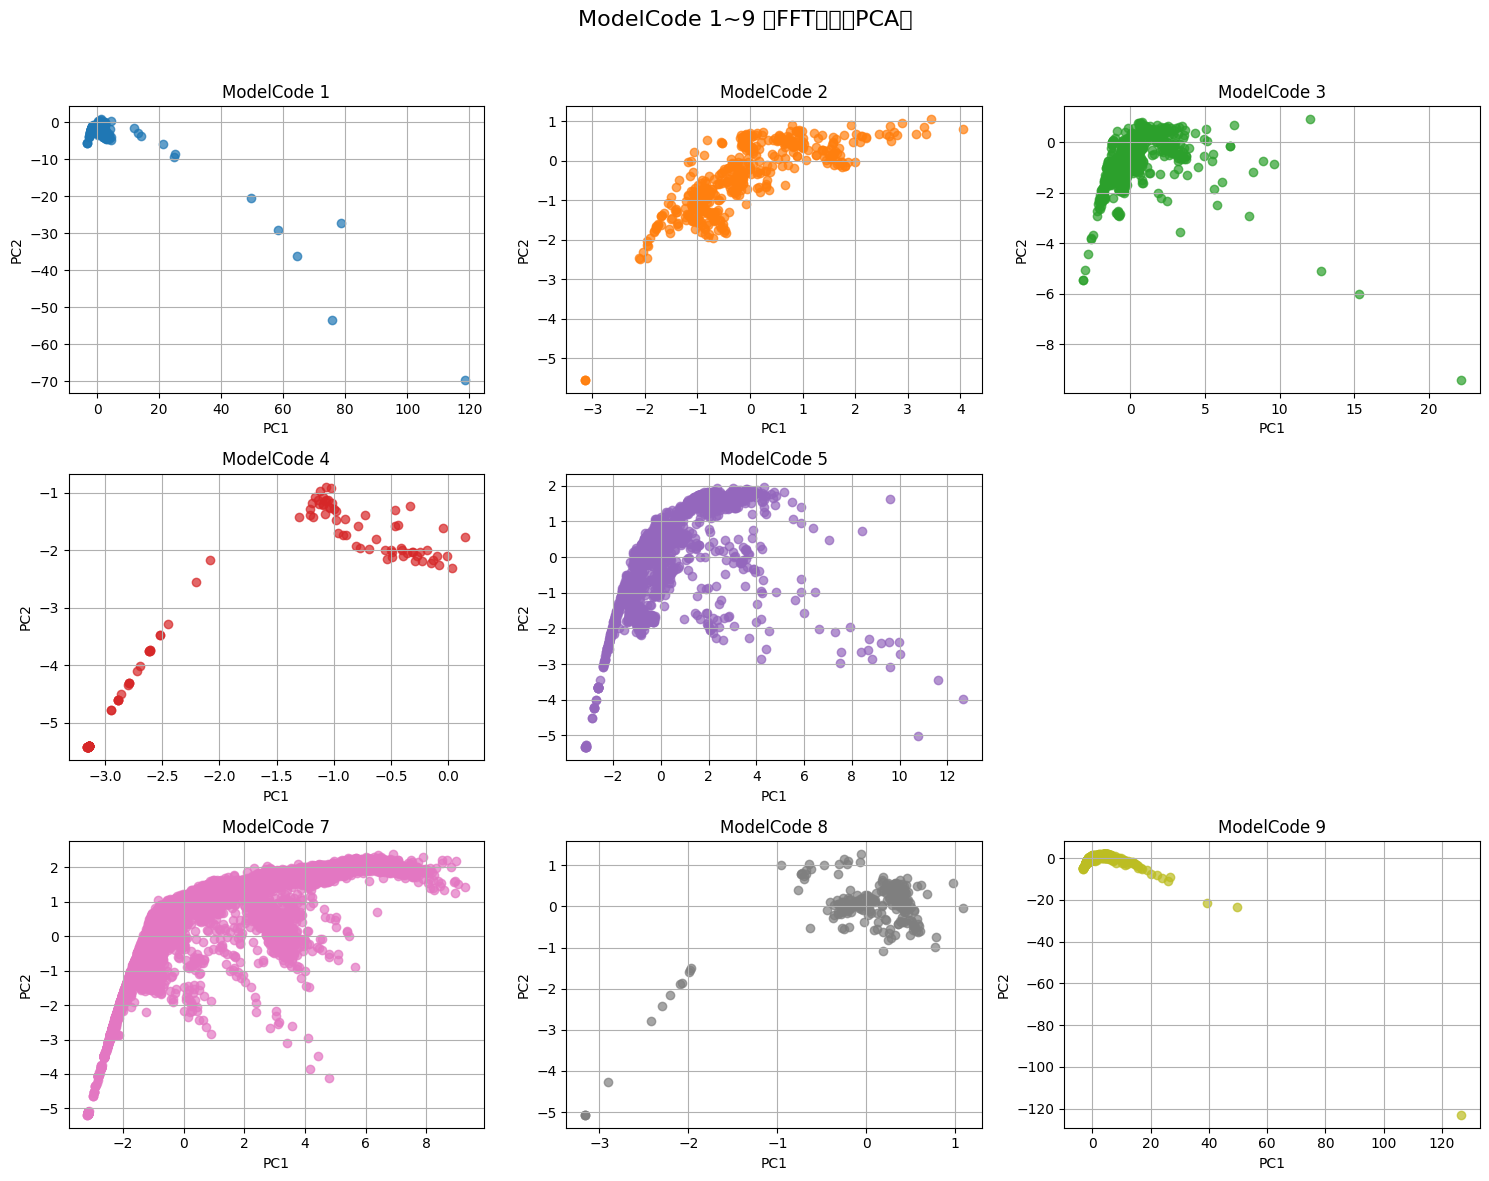

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# === ModelCode 1〜9 を抽出 ===
mask_model_1_to_9 = final_df["ModelCode"].isin(range(1, 10))
features_subset = feature_df[mask_model_1_to_9]
modelcode_subset = final_df.loc[mask_model_1_to_9, "ModelCode"]

# === 数値列のみ抽出し、NaNを除外 ===
numerical_features = features_subset.select_dtypes(include=["number"])
numerical_features_clean = numerical_features.dropna()
modelcode_clean = modelcode_subset[numerical_features_clean.index]

# === スケーリングとPCA ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_features_clean)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# === PCA結果をDataFrameにまとめる ===
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["ModelCode"] = modelcode_clean.values

# === サブプロット (3×3グリッド) ===
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("ModelCode 1~9 のFFT特徴（PCA）", fontsize=16)

# パレットを固定（ModelCodeの値が1〜9のときのみ有効）
palette = sns.color_palette("tab10", n_colors=9)
color_map = {code: palette[i] for i, code in enumerate(range(1, 10))}

for idx, code in enumerate(range(1, 10)):
    ax = axes[idx // 3, idx % 3]
    subset = pca_df[pca_df["ModelCode"] == code]
    
    if not subset.empty:
        ax.scatter(
            subset["PC1"], 
            subset["PC2"], 
            color=color_map[code], 
            alpha=0.7
        )
        ax.set_title(f"ModelCode {code}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.grid(True)
    else:
        ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [21]:
numerical_features_clean 

,ModelCode,mean,std,max,min,median,peak_ratio,energy,spectral_centroid,spectral_entropy,spectral_flatness,low_freq_energy,mid_freq_energy,high_freq_energy
1,2,0.000149,0.001345,0.03,0.0,0.00,201.328770,0.0183,672.502365,4.660049,0.000081,0.0183,0.0000,0.0000
2,2,0.005416,0.012075,0.43,0.0,0.00,79.394240,1.7514,4919.621532,6.148217,0.000255,0.4741,0.6135,0.6638
3,2,0.001409,0.003925,0.05,0.0,0.00,35.485909,0.1739,5143.167042,6.881549,0.000041,0.0448,0.0529,0.0762
4,2,0.004851,0.011682,0.44,0.0,0.00,90.702761,1.5999,4909.170230,5.746624,0.000215,0.3780,0.6433,0.5786
7,1,0.001049,0.005478,0.08,0.0,0.00,76.262381,0.3111,2130.833104,5.451153,0.000021,0.3056,0.0055,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28196,5,0.000030,0.000599,0.02,0.0,0.00,666.444518,0.0036,283.082547,3.121421,0.000346,0.0035,0.0000,0.0001
28197,5,0.000013,0.000387,0.02,0.0,0.00,1537.279016,0.0015,93.266045,2.338372,0.000782,0.0015,0.0000,0.0000
28198,5,0.025078,0.167625,12.24,0.0,0.01,488.077005,287.2702,5135.094229,2.010369,0.016841,12.3139,273.6823,1.2740
28199,5,0.023929,0.122194,7.93,0.0,0.01,331.396911,155.0399,4907.149425,2.382916,0.031050,15.1072,137.8215,2.1112


In [22]:
from sklearn.ensemble import IsolationForest

# Isolation Forest による異常検出
iso_model = IsolationForest(contamination=0.03, random_state=42)
anomaly_labels = iso_model.fit_predict(X_scaled)  # -1: 異常, 1: 正常

# 結果をpca_dfに追加
pca_df["anomaly"] = anomaly_labels  # -1 or 1


C:\Users\H6445\AppData\Local\Temp\ipykernel_6772\2149399326.py:22: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(outlier["PC1"], outlier["PC2"], color='red', edgecolors='black', marker='x', s=50, label='anomaly')
C:\Users\H6445\AppData\Local\Temp\ipykernel_6772\2149399326.py:31: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\ipykernel_6772\2149399326.py:31: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\ipykernel_6772\2149399326.py:31: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\i

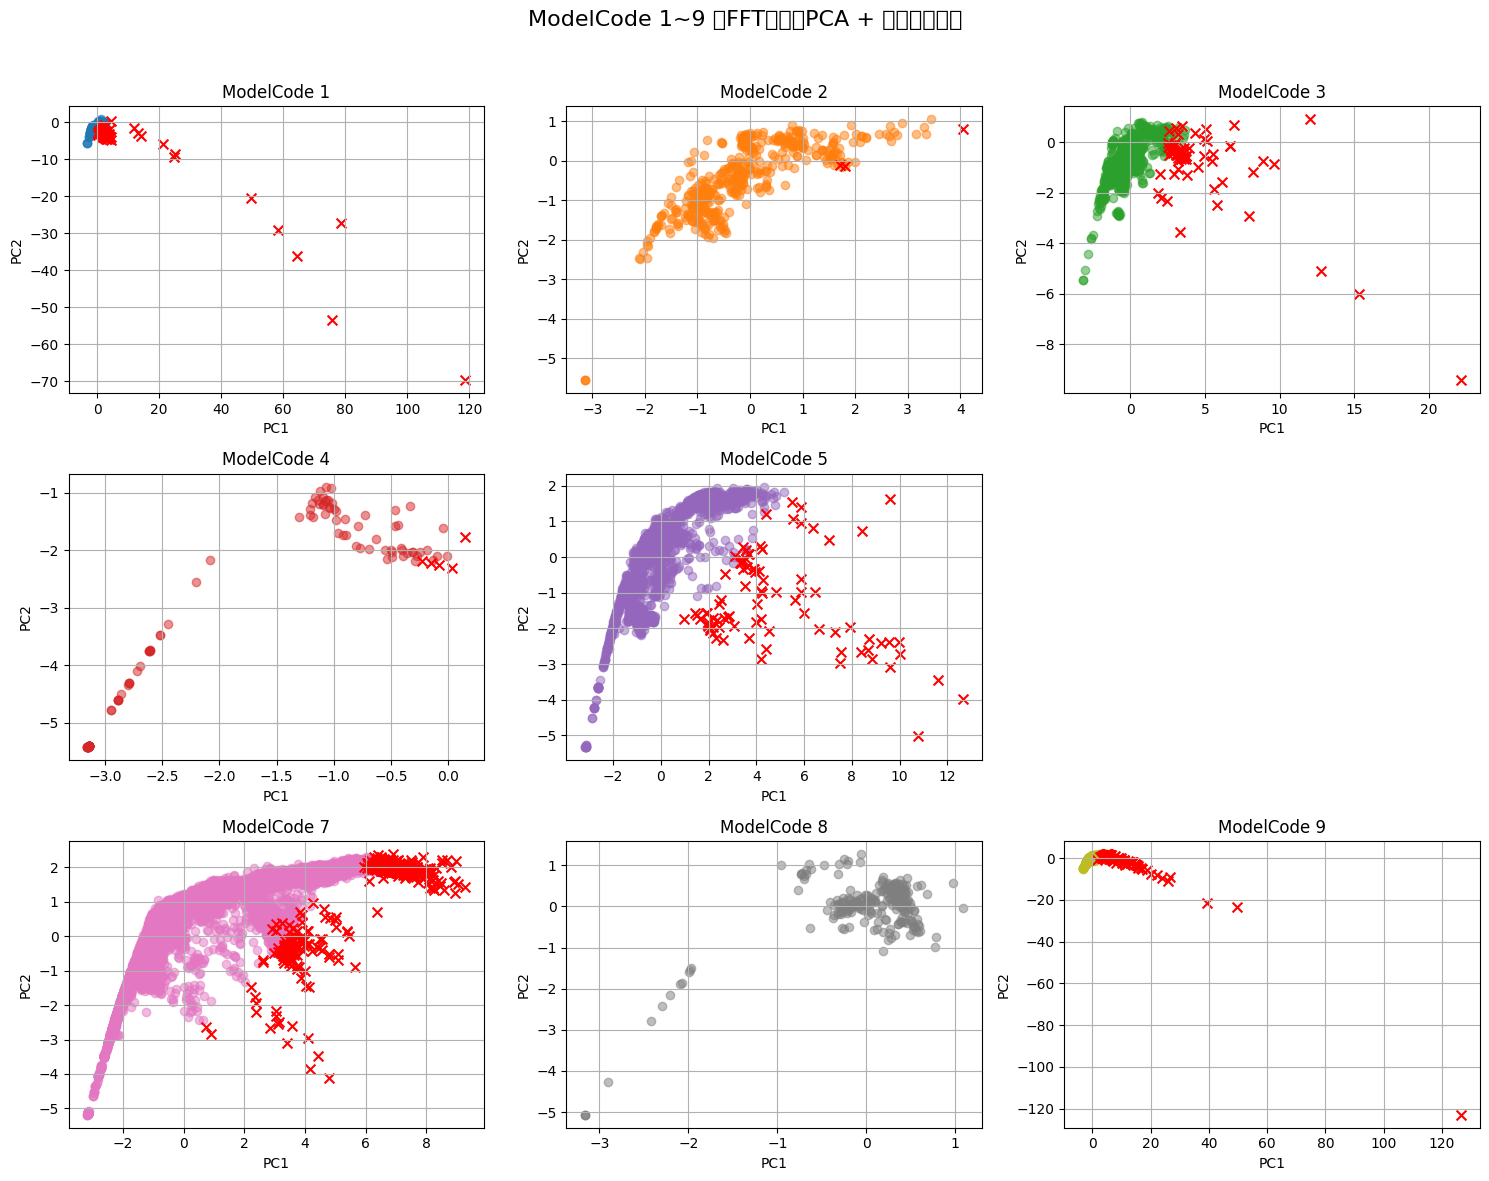

In [23]:
# 再描画：ModelCode 1〜9 ごとのグリッド（異常点は赤）

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("ModelCode 1~9 のFFT特徴（PCA + 異常点表示）", fontsize=16)

# カラーマップ：正常点はModelCode色、異常点は赤
palette = sns.color_palette("tab10", n_colors=9)
color_map = {code: palette[i] for i, code in enumerate(range(1, 10))}

for idx, code in enumerate(range(1, 10)):
    ax = axes[idx // 3, idx % 3]
    subset = pca_df[pca_df["ModelCode"] == code]
    
    if not subset.empty:
        normal = subset[subset["anomaly"] == 1]
        outlier = subset[subset["anomaly"] == -1]

        # 正常点
        ax.scatter(normal["PC1"], normal["PC2"], alpha=0.5, color=color_map[code], label='normal')

        # 異常点（赤で目立たせる）
        ax.scatter(outlier["PC1"], outlier["PC2"], color='red', edgecolors='black', marker='x', s=50, label='anomaly')

        ax.set_title(f"ModelCode {code}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.grid(True)
    else:
        ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


C:\Users\H6445\AppData\Local\Temp\ipykernel_6772\781947110.py:26: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\ipykernel_6772\781947110.py:26: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\ipykernel_6772\781947110.py:26: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\ipykernel_6772\781947110.py:26: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\ipykernel_6772\781947110.py:26: UserWarning: Glyph 12539 (\N{KATAKANA MIDDLE DOT}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppDa

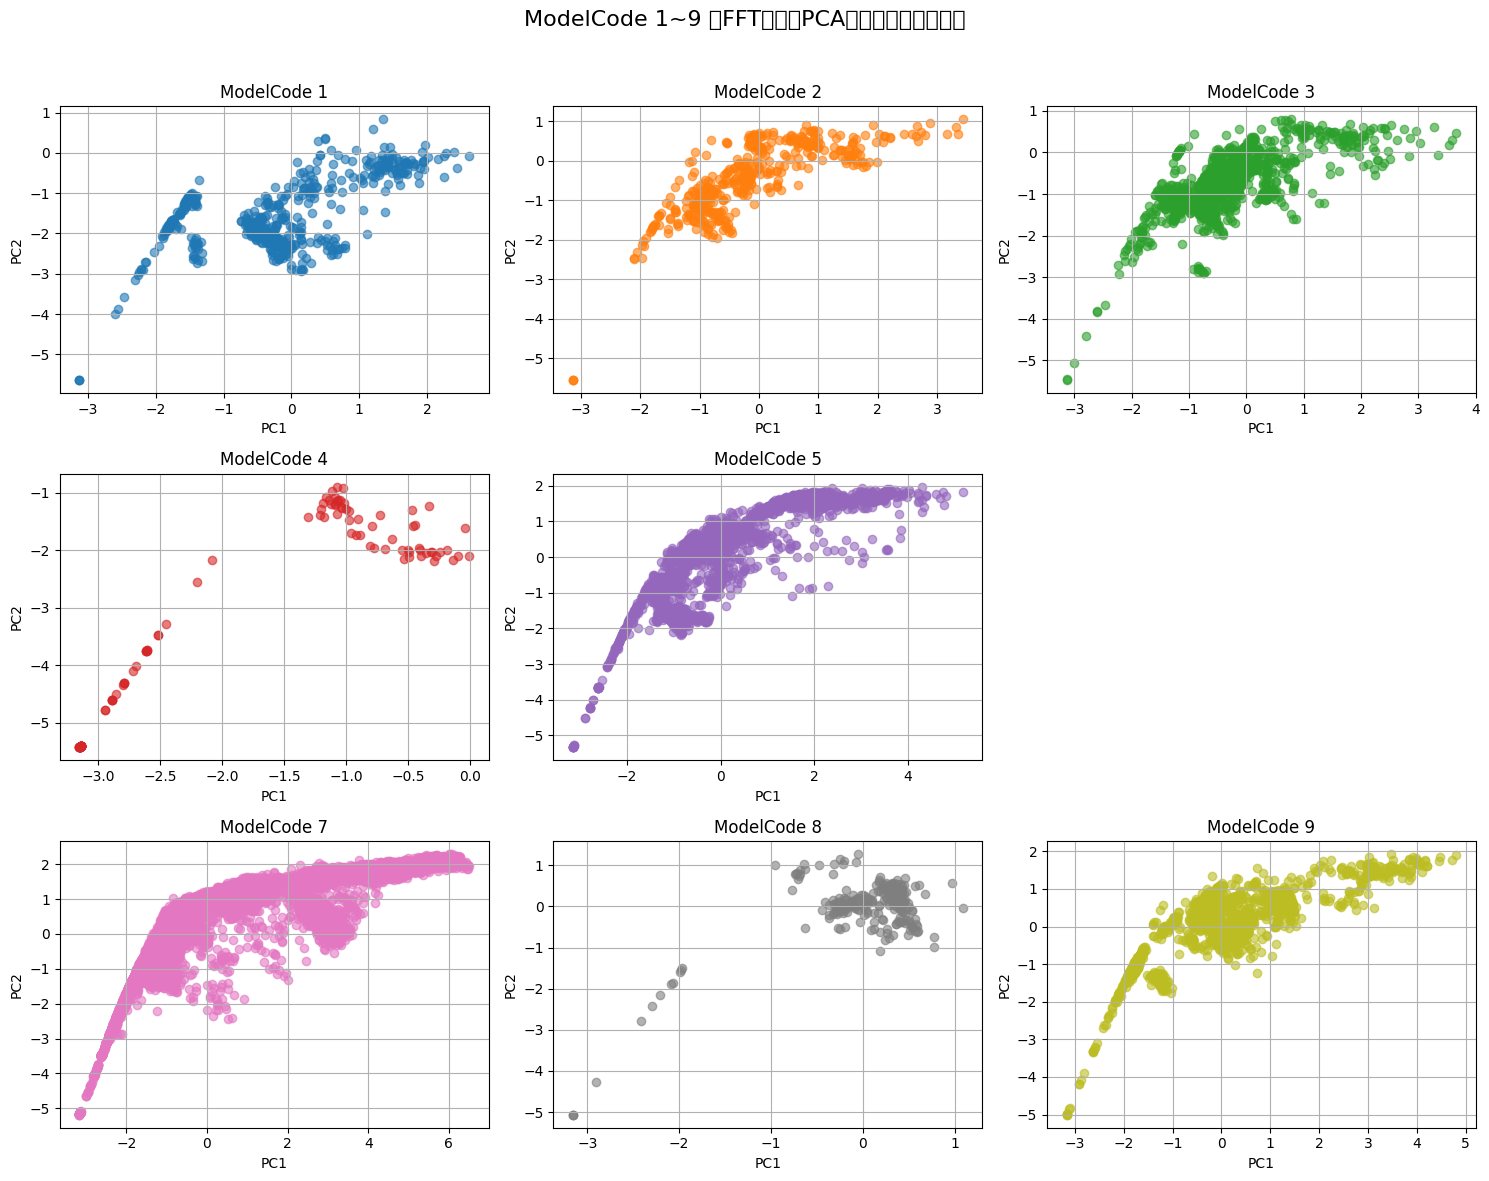

In [24]:
# 正常データ（anomaly == 1）だけを抽出
normal_df = pca_df[pca_df["anomaly"] == 1]

# グリッドプロット（3x3）
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("ModelCode 1~9 のFFT特徴（PCA・正常データのみ）", fontsize=16)

# カラーマップ（ModelCodeごとの色）
palette = sns.color_palette("tab10", n_colors=9)
color_map = {code: palette[i] for i, code in enumerate(range(1, 10))}

# 各モデルごとに描画
for idx, code in enumerate(range(1, 10)):
    ax = axes[idx // 3, idx % 3]
    subset = normal_df[normal_df["ModelCode"] == code]

    if not subset.empty:
        ax.scatter(subset["PC1"], subset["PC2"], color=color_map[code], alpha=0.6)
        ax.set_title(f"ModelCode {code}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.grid(True)
    else:
        ax.axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [25]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# === ModelCode 1〜9 を抽出 ===
mask_model_1_to_9 = final_df["ModelCode"].isin(range(1, 10))
features_subset = feature_df[mask_model_1_to_9]
modelcode_subset = final_df.loc[mask_model_1_to_9, "ModelCode"]

# === 数値列のみ抽出し、NaNを除外 ===
numerical_features = features_subset.select_dtypes(include=["number"])
numerical_features_clean = numerical_features.dropna()
modelcode_clean = modelcode_subset[numerical_features_clean.index]

# === スケーリングとPCA（3次元） ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_features_clean)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

# === PCA結果をDataFrameにまとめる ===
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3"])
pca_df["ModelCode"] = modelcode_clean.values.astype(str)

# === 3x3 のサブプロットレイアウト（3D用） ===
fig = make_subplots(
    rows=3, cols=3,
    specs=[[{'type': 'scene'}]*3]*3,
    subplot_titles=[f"ModelCode {i}" for i in range(1, 10)]
)

# === 各ModelCodeに対応する3D散布図を各サブプロットに描画 ===
for i, code in enumerate(range(1, 10)):
    subset = pca_df[pca_df["ModelCode"] == str(code)]
    row = i // 3 + 1
    col = i % 3 + 1

    if not subset.empty:
        scatter = go.Scatter3d(
            x=subset["PC1"],
            y=subset["PC2"],
            z=subset["PC3"],
            mode='markers',
            marker=dict(size=3, opacity=0.7),
            name=f"ModelCode {code}",
            showlegend=False
        )
        fig.add_trace(scatter, row=row, col=col)

# === レイアウト調整 ===
fig.update_layout(
    height=1000, width=1000,
    title_text="ModelCode 1~9 のFFT特徴（PCA 3次元 - 3×3回転可能表示）",
    margin=dict(l=0, r=0, b=0, t=50)
)

# 各subplotに軸ラベルを設定
for i in range(1, 10):
    scene_id = f"scene{i}"
    fig['layout'][scene_id]['xaxis']['title'] = 'PC1'
    fig['layout'][scene_id]['yaxis']['title'] = 'PC2'
    fig['layout'][scene_id]['zaxis']['title'] = 'PC3'

fig.show()


In [26]:
from scipy.stats import zscore

# Zスコア計算
z_scores = np.abs(zscore(numerical_features_clean))

# 異常条件（Zスコアが3を超える列が1つでもある行を異常とみなす）
is_outlier = (z_scores > 3).any(axis=1)

# PCA対象データに絞る
numerical_filtered = numerical_features_clean.copy()
modelcode_filtered = modelcode_clean.copy()

# anomaly列作成（1=正常, -1=異常）
anomaly_flags = np.where(is_outlier, -1, 1)

# PCA用スケーリングと変換
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_filtered)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

# 結果データフレーム
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3"])
pca_df["ModelCode"] = modelcode_filtered.values.astype(str)
pca_df["anomaly"] = anomaly_flags  # 👈 この列が必要
print(pca_df.head())



        PC1       PC2       PC3 ModelCode  anomaly
0 -1.702347 -1.407239 -0.903518         2        1
1 -1.085191 -0.287647 -0.016489         2        1
2 -1.123537 -0.012877  0.255293         2        1
3 -1.134234 -0.392917 -0.090384         2        1
4 -1.466043 -1.003637 -0.673907         1       -1


In [27]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# === カラーマップ：ModelCodeごとに固定色 ===
palette = sns.color_palette("tab10", n_colors=9)
color_map = {str(code): f"rgb({int(r*255)},{int(g*255)},{int(b*255)})"
             for code, (r, g, b) in zip(range(1, 10), palette)}

# === 3×3の3Dサブプロット構成 ===
fig = make_subplots(
    rows=3, cols=3,
    specs=[[{'type': 'scene'}]*3]*3,
    subplot_titles=[f"ModelCode {i}" for i in range(1, 10)]
)

# === 各 ModelCode ごとに描画 ===
for i, code in enumerate(range(1, 10)):
    code_str = str(code)
    subset = pca_df[pca_df["ModelCode"] == code_str]
    row = i // 3 + 1
    col = i % 3 + 1

    if not subset.empty:
        # 正常点（anomaly == 1）
        normal = subset[subset["anomaly"] == 1]
        fig.add_trace(go.Scatter3d(
            x=normal["PC1"], y=normal["PC2"], z=normal["PC3"],
            mode='markers',
            marker=dict(size=3, color=color_map[code_str], symbol="circle", opacity=0.5),
            name=f"Model {code_str} Normal",
            showlegend=False
        ), row=row, col=col)

        # 異常点（anomaly == -1）
        outlier = subset[subset["anomaly"] == -1]
        if not outlier.empty:
            fig.add_trace(go.Scatter3d(
                x=outlier["PC1"], y=outlier["PC2"], z=outlier["PC3"],
                mode='markers',
                marker=dict(size=5, color="red", symbol="x", opacity=1.0, line=dict(width=1, color='black')),
                name=f"Model {code_str} Anomaly",
                showlegend=False
            ), row=row, col=col)
    else:
        # データが空の場合も軸だけは維持
        fig.add_trace(go.Scatter3d(
            x=[0], y=[0], z=[0],
            mode='markers',
            marker=dict(size=0.01, color='rgba(0,0,0,0)'),
            showlegend=False
        ), row=row, col=col)

# === 軸とレイアウト設定 ===
for i in range(1, 10):
    scene_id = f"scene{i}"
    fig.update_layout(**{
        scene_id: dict(
            xaxis=dict(title="PC1"),
            yaxis=dict(title="PC2"),
            zaxis=dict(title="PC3")
        )
    })

fig.update_layout(
    height=1000, width=1000,
    title="ModelCode 1〜9 のPCA 3D分布（異常点を赤×で強調, 回転可能）",
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show()


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

# === Zスコアで外れ値を検出（3以上を外れ値とみなす） ===
z_scores = np.abs(zscore(numerical_features_clean))
is_outlier = (z_scores > 3).any(axis=1)

# 外れ値を除去
numerical_filtered = numerical_features_clean[~is_outlier]
modelcode_filtered = modelcode_clean[~is_outlier]

# === スケーリングとPCA（3次元） ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_filtered)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X_scaled)

# === 結果をDataFrameにまとめる ===
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3"])
pca_df["ModelCode"] = modelcode_filtered.values.astype(str)

# === カラーマップをModelCodeに固定 ===
palette = sns.color_palette("tab10", n_colors=9)
color_map = {str(code): f"rgb({int(r*255)},{int(g*255)},{int(b*255)})"
             for code, (r, g, b) in zip(range(1, 10), palette)}

# === 3×3サブプロット（回転可能な3D） ===
fig = make_subplots(
    rows=3, cols=3,
    specs=[[{'type': 'scene'}]*3]*3,
    subplot_titles=[f"ModelCode {i}" for i in range(1, 10)]
)

for i, code in enumerate(range(1, 10)):
    code_str = str(code)
    subset = pca_df[pca_df["ModelCode"] == code_str]
    row = i // 3 + 1
    col = i % 3 + 1

    if not subset.empty:
        fig.add_trace(go.Scatter3d(
            x=subset["PC1"], y=subset["PC2"], z=subset["PC3"],
            mode='markers',
            marker=dict(size=3, color=color_map[code_str], opacity=0.7),
            name=f"ModelCode {code_str}",
            showlegend=False
        ), row=row, col=col)
    else:
        # ダミーで空の透明点を描画して軸を維持
        fig.add_trace(go.Scatter3d(
            x=[0], y=[0], z=[0],
            mode='markers',
            marker=dict(size=0.01, color='rgba(0,0,0,0)'),
            showlegend=False
        ), row=row, col=col)

# === 各サブプロットの軸設定 ===
for i in range(1, 10):
    scene_id = f"scene{i}"
    fig.update_layout(**{
        scene_id: dict(
            xaxis=dict(title="PC1"),
            yaxis=dict(title="PC2"),
            zaxis=dict(title="PC3")
        )
    })

# === レイアウト ===
fig.update_layout(
    height=1000, width=1000,
    title="Zスコア法で外れ値除去後のPCA 3D分布（ModelCode 1〜9）",
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show()
